In [1]:
import pandas_datareader.data as web
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#plt.style.use('ggplot')
%matplotlib inline

In [2]:
etf_df = pd.read_csv("resources/etf_df.csv")

### Period Datasets
1M, 3M, 6M, 1Y, 5Y, 10Y, and MAX

In [3]:
# last date configured
last_date = list(etf_df.Date)[-1]
last_split = last_date.split('-')
d_list = [int(i) for i in last_split]
date = dt.date(d_list[0], d_list[1], d_list[2])

In [4]:
# calculate the dates from the last data point for 1m, 3m, 6m, 1y, 5y, and 10y...
# ...then convert to string format for filtering DataFrame
one_mo = (date - dt.timedelta(days=30.4167)).strftime("%Y-%m-%d")
three_mo = (date - dt.timedelta(days=91.2501)).strftime("%Y-%m-%d")
six_mo = (date - dt.timedelta(days=182.5)).strftime("%Y-%m-%d")
one_yr = (date - dt.timedelta(days=365)).strftime("%Y-%m-%d")
five_yr = (date - dt.timedelta(days=1825)).strftime("%Y-%m-%d")
ten_yr = (date - dt.timedelta(days=3650)).strftime("%Y-%m-%d")

In [5]:
etf_df.loc[(etf_df.symbol == 'QQQ')&(etf_df.Date >= ten_yr)&(etf_df.Date <= last_date)]

Date        Open        High         Low       Close   Adj Close  \
3028  2011-03-22   55.580002   55.610001   55.279999   55.400002   50.144291   
3029  2011-03-23   55.200001   55.869999   54.820000   55.709999   50.424877   
3030  2011-03-24   56.130001   56.820000   55.820000   56.700001   51.320961   
3031  2011-03-25   56.880001   57.220001   56.730000   56.840000   51.447681   
3032  2011-03-28   57.090000   57.099998   56.500000   56.529999   51.167080   
...          ...         ...         ...         ...         ...         ...   
5539  2021-03-15  315.790009  319.000000  314.100006  318.829987  318.829987   
5540  2021-03-16  321.089996  324.200012  319.100006  320.579987  320.579987   
5541  2021-03-17  317.450012  323.850006  315.679993  321.899994  321.899994   
5542  2021-03-18  316.869995  317.880005  311.570007  312.040009  312.040009   
5543  2021-03-19  311.869995  314.730011  309.679993  313.140015  313.140015   

        Volume symbol  
3028  36162100    QQQ  
3029  60365100    QQQ  
3030  69502400    QQQ  
3031  74131100    QQQ  
3032  37824000    QQQ  
...        ...    ...  
5539  42955700    QQQ  
5540  54032900    QQQ  
5541  77681800    QQQ  
5542  82718100    QQQ  
5543  74057550    QQQ  

[2516 rows x 8 columns]

### 1. Relative Returns

In [6]:
# three lists created to cover possible portfolio combinations to display
qqq_symbols = ['QQQ', 'SPLG', 'DIA', 'VEU']
sp_symbols = ['QQQ', 'SPLG', 'IVV', 'VOO', 'SPY', 'DIA']
glob_symbols = ['QQQ', 'SPLG', 'ACWI', 'VEU', 'VSS']

#list of lists...
portfolios = [qqq_symbols, sp_symbols, glob_symbols]

# list of years we need a portfolio display for
dates_list = [one_mo, three_mo, six_mo, one_yr, five_yr, ten_yr]
dates_str = ['1M', '3M', '6M', '1Y', '5Y', '10Y']

In [7]:
# create function that exports a DataFrame for the list of symbols' relative returns
def rel_returns(symbols, start):
    df = pd.DataFrame(columns = symbols)
    for symbol in symbols:
        df_filter = etf_df.loc[(etf_df.symbol == symbol)&(etf_df.Date >= start)&(etf_df.Date <= last_date)]
        df[symbol] = list(df_filter.Close)
    df['Date'] = list(df_filter.Date)
    df.set_index("Date", inplace = True)
    returns = (df/df.iloc[0])
    return returns

def close_compare(symbols, start):
    df = pd.DataFrame(columns = symbols)
    for symbol in symbols:
        df_filter = etf_df.loc[(etf_df.symbol == symbol)&(etf_df.Date >= start)&(etf_df.Date <= last_date)]
        df[symbol] = list(df_filter.Close)
    df['Date'] = list(df_filter.Date)
    df.set_index("Date", inplace = True)
    return df

In [8]:
# create function that exports two charts for every period specified in dates_list...
# ...one for Close price and one for relative returns
def returns_charts(symbols):
    for x in range(len(dates_list)):
        new_df = rel_returns(symbols, dates_list[x])
        new_df.plot(figsize=(10,8))
        plt.title(f'Relative Returns: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
        plt.xlabel('Date', fontsize=22)
        plt.legend(fontsize=18)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"../images/returns/returns_{symbols[-1]}_{dates_str[x]}.jpg", dpi=75)
        
def close_charts(symbols):
    for x in range(len(dates_list)):
        new_df = close_compare(symbols, dates_list[x])
        new_df.plot(figsize=(10,8))
        plt.title(f'Close: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
        plt.xlabel('Date', fontsize=22)
        plt.legend(fontsize=18)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"../images/close/close_{symbols[-1]}_{dates_str[x]}.jpg", dpi=75)

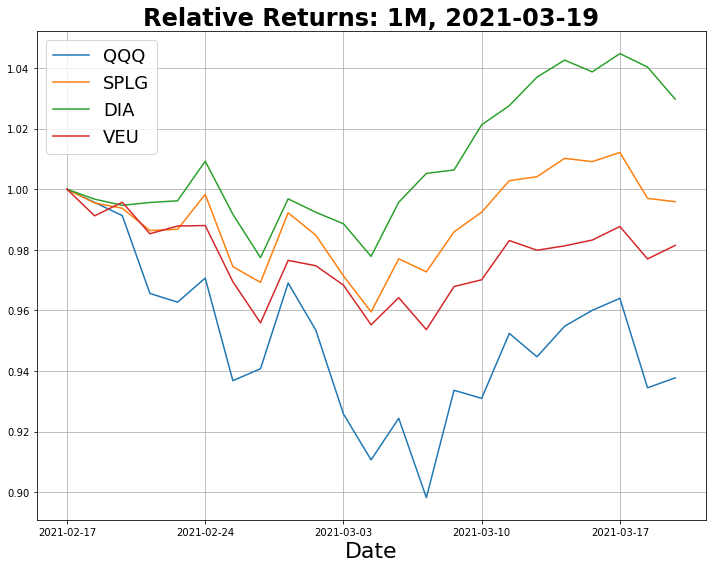

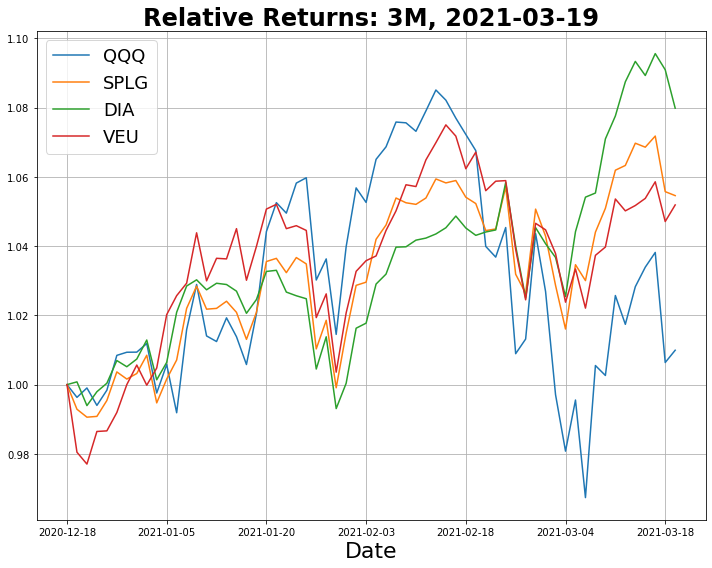

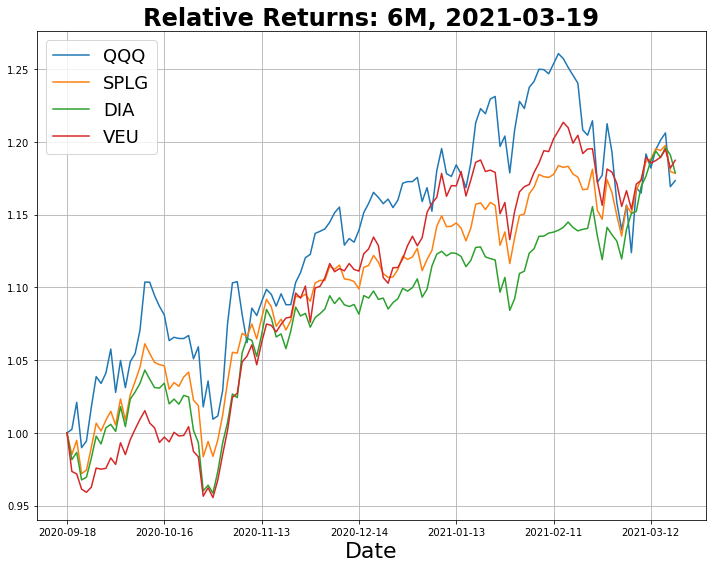

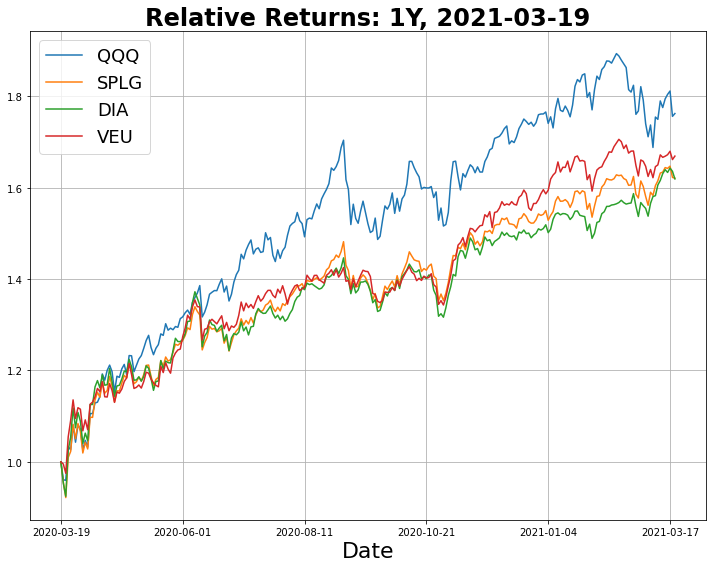

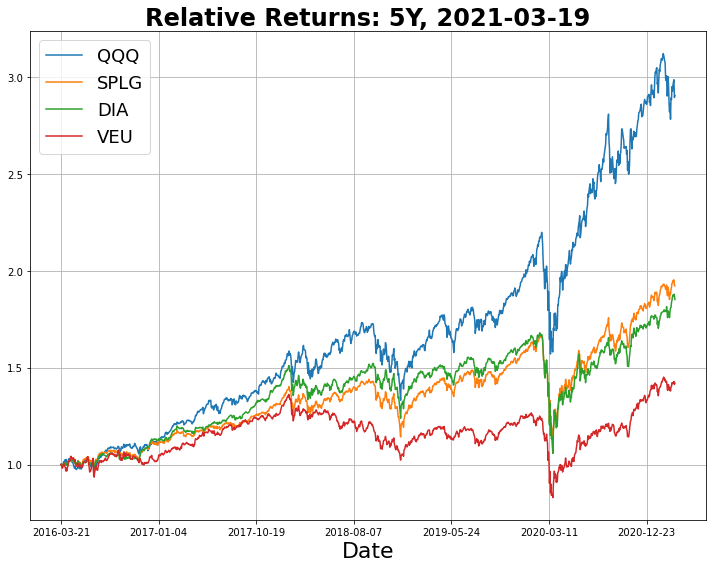

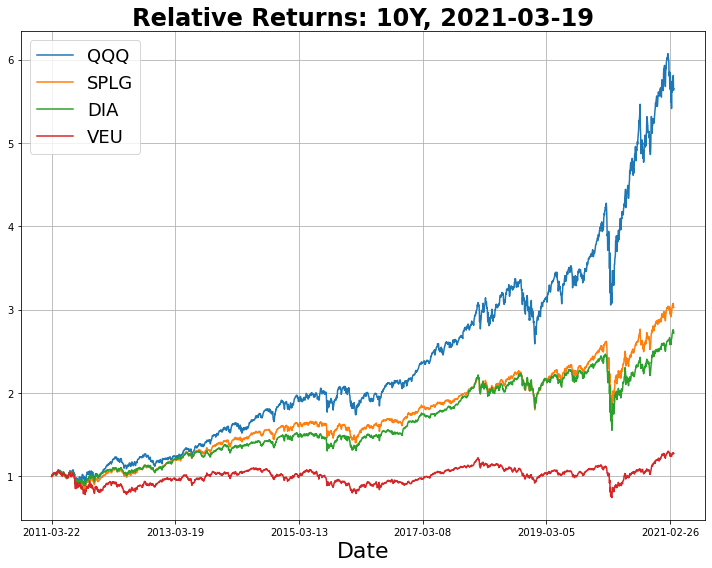

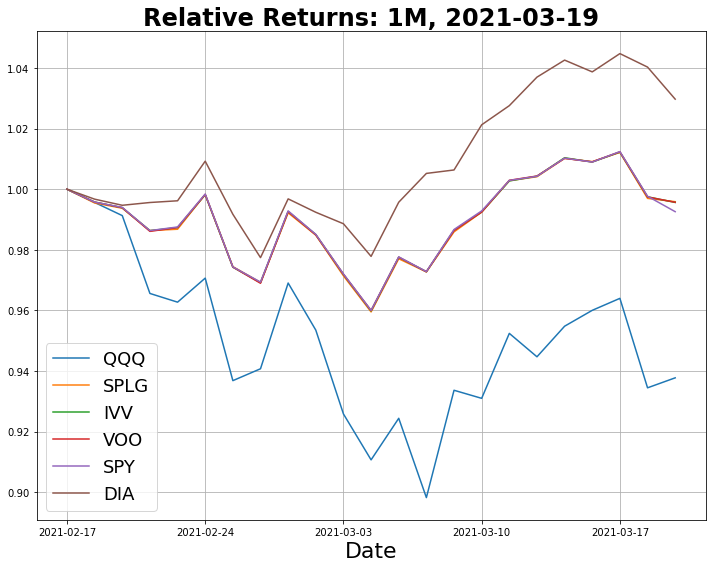

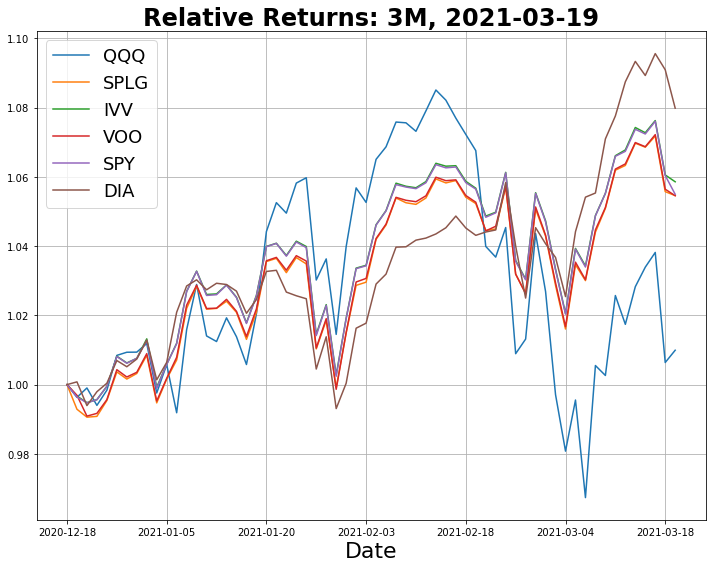

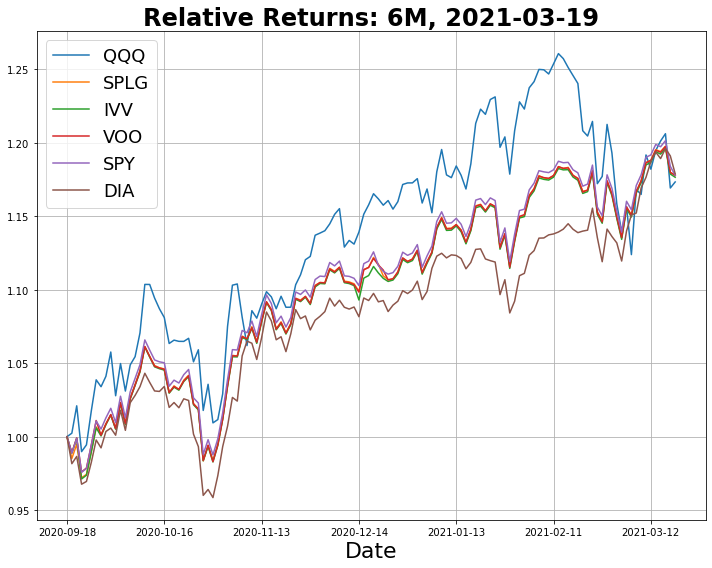

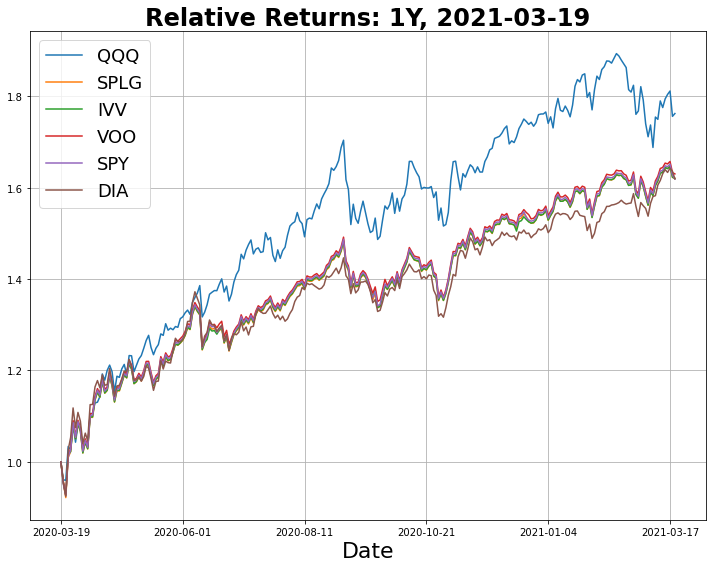

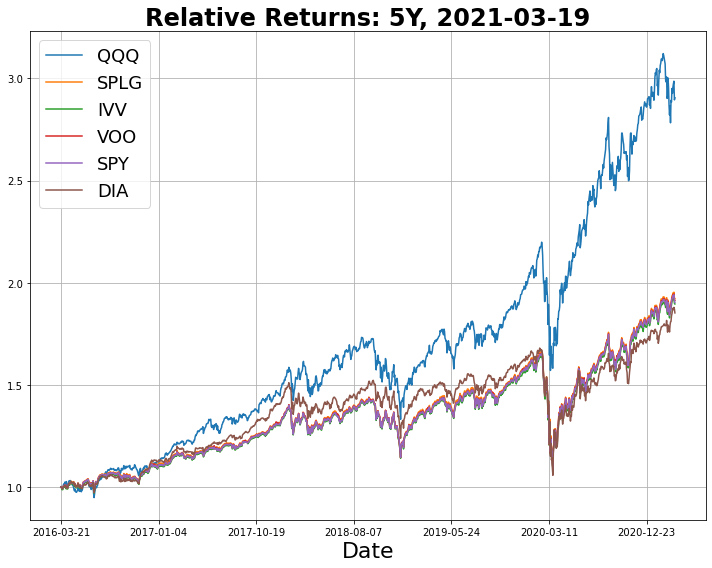

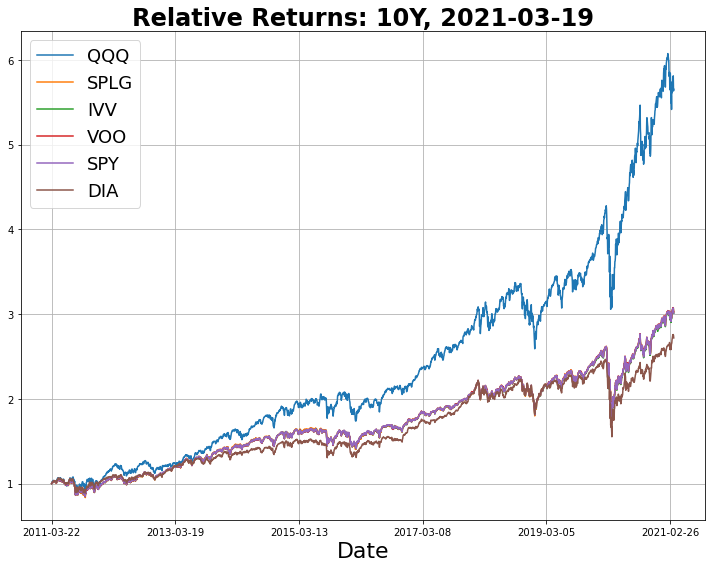

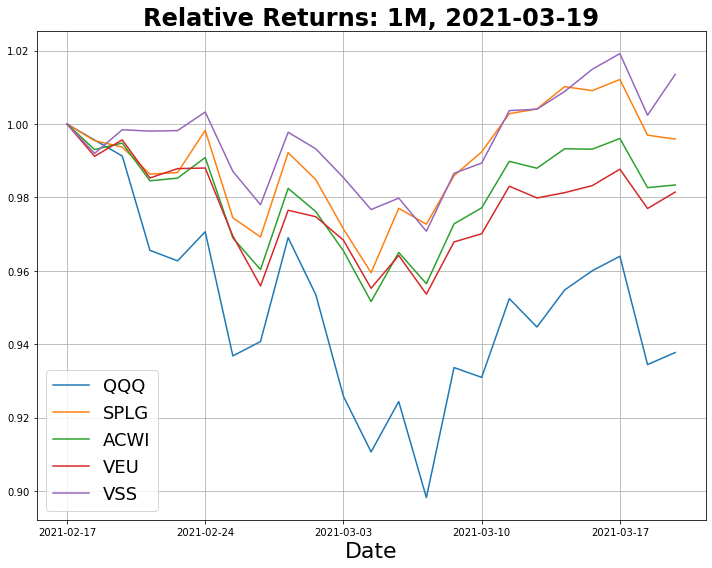

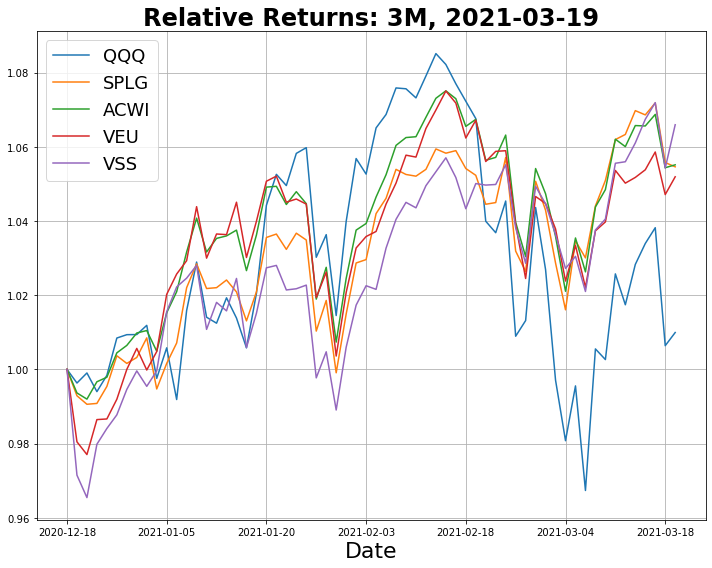

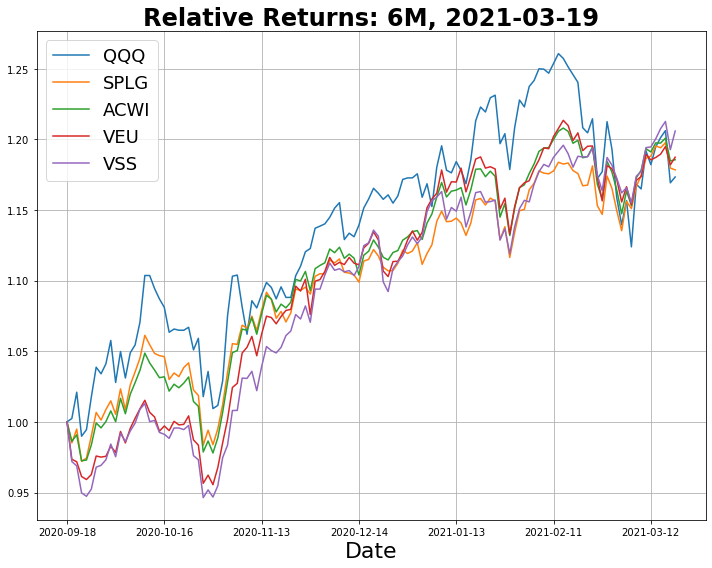

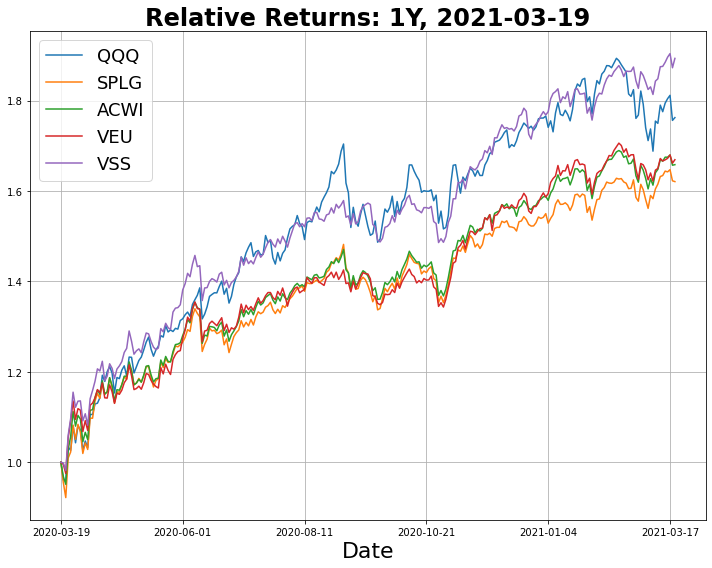

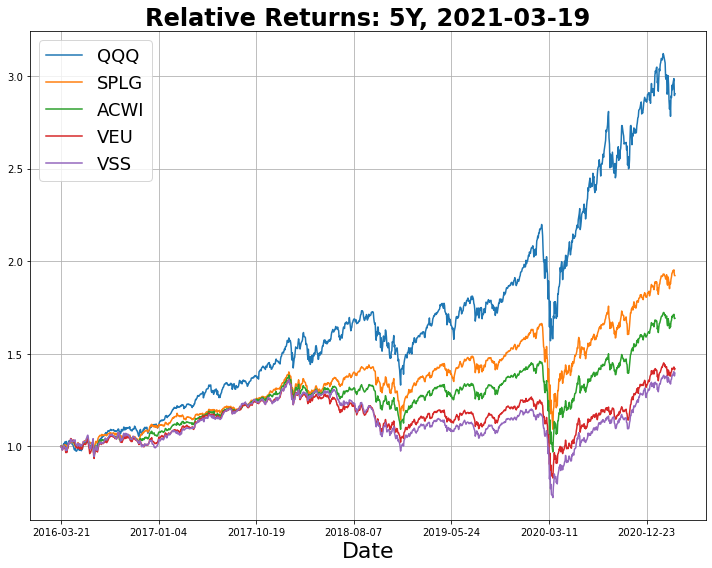

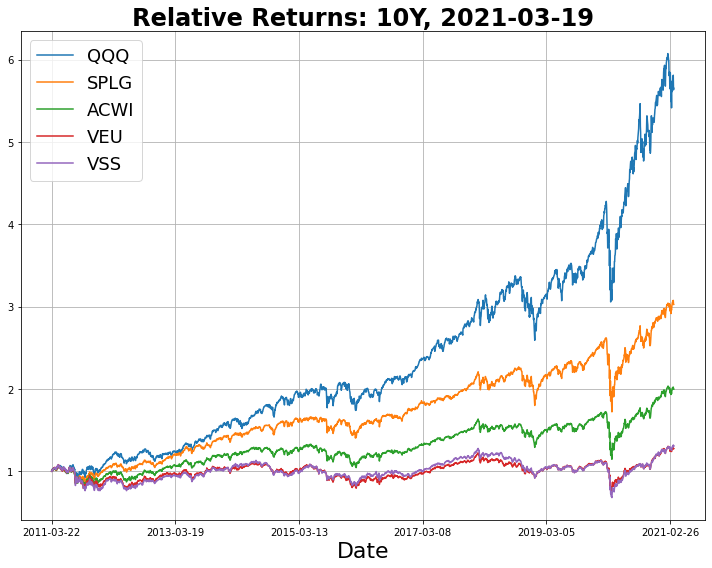

In [9]:
returns_charts(qqq_symbols)
returns_charts(sp_symbols)
returns_charts(glob_symbols)

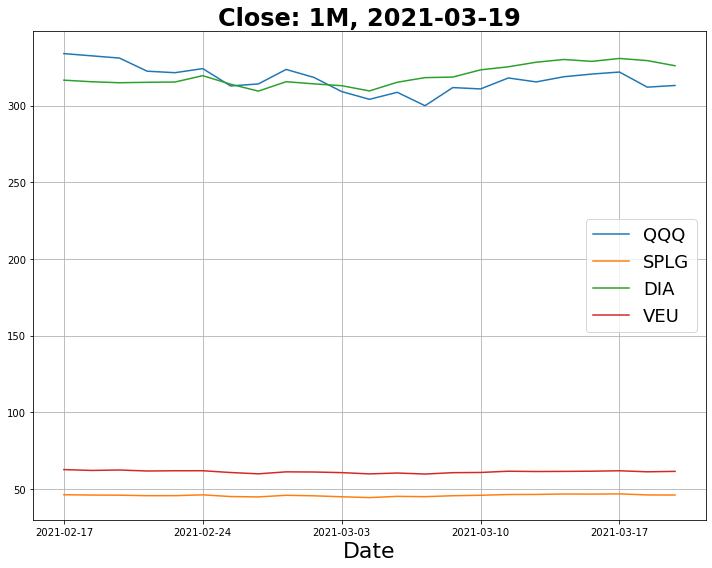

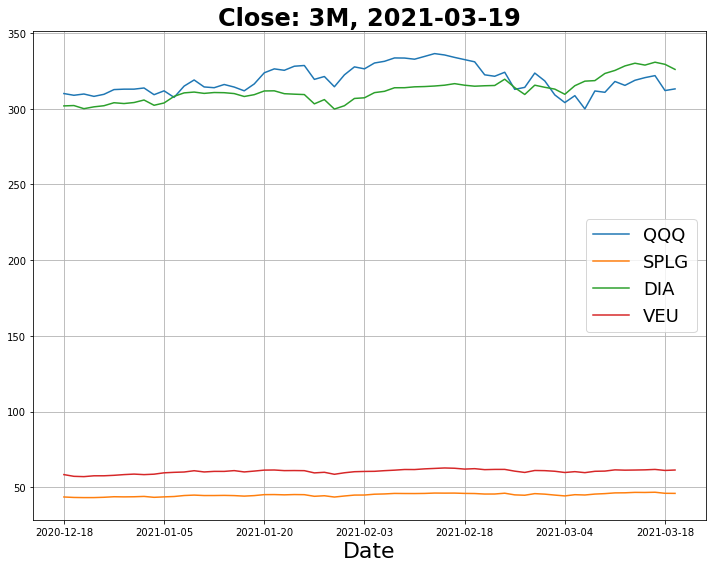

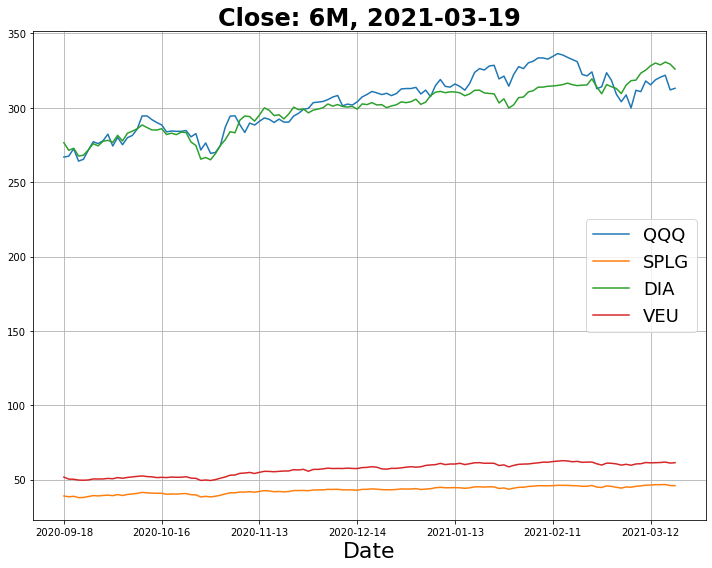

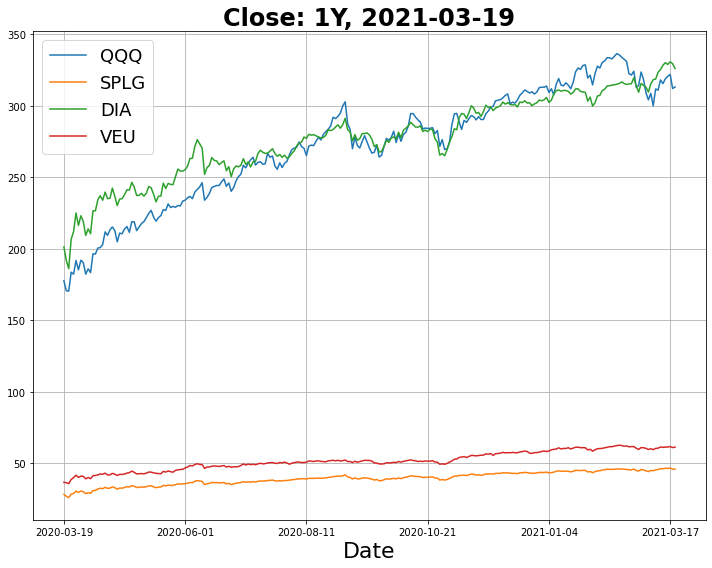

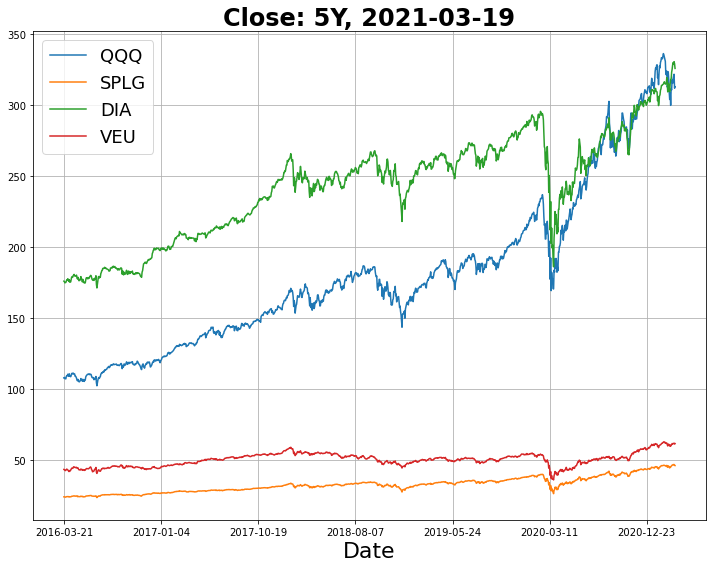

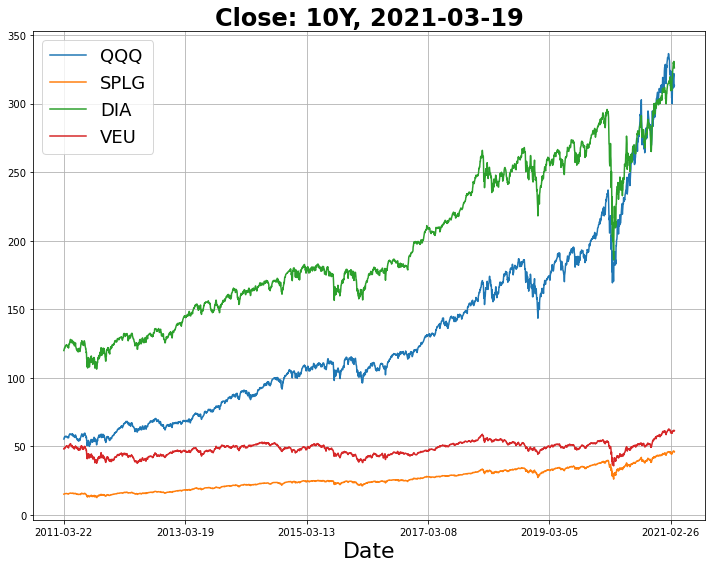

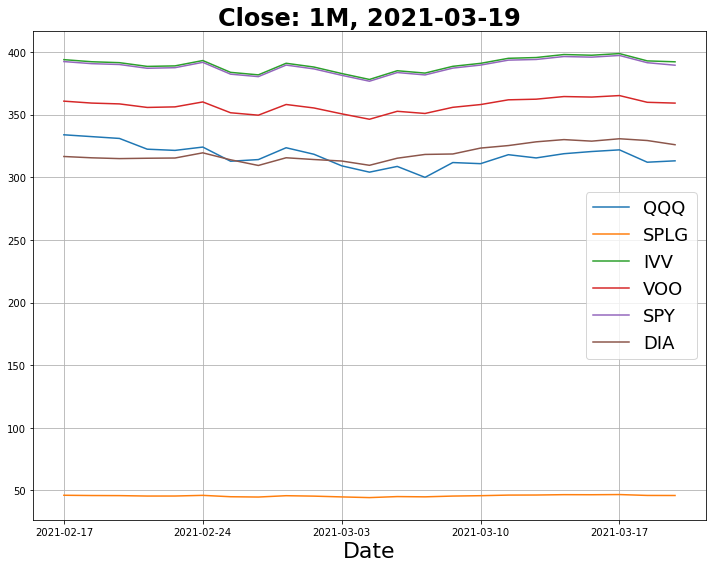

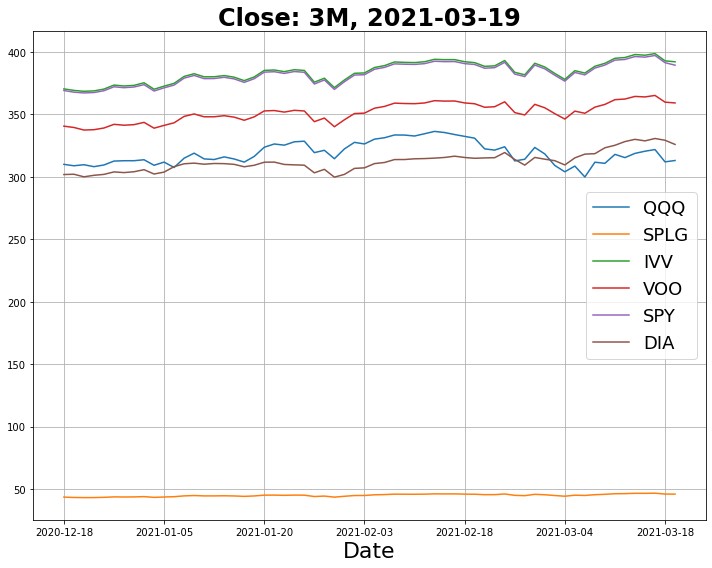

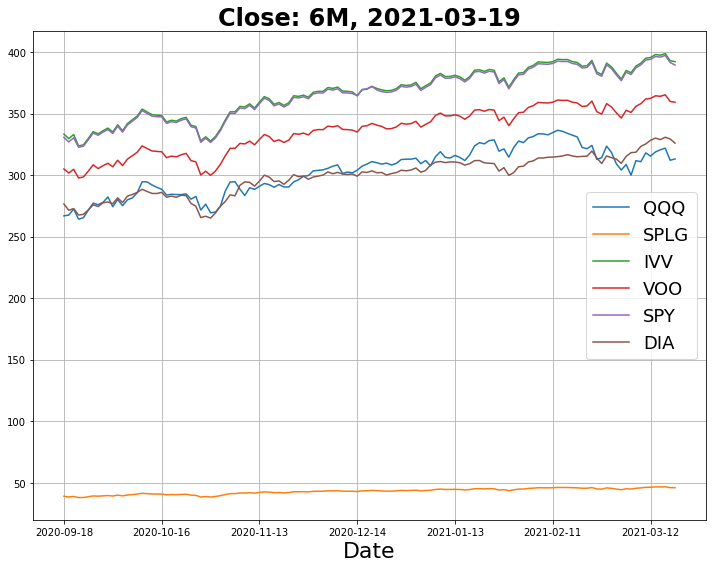

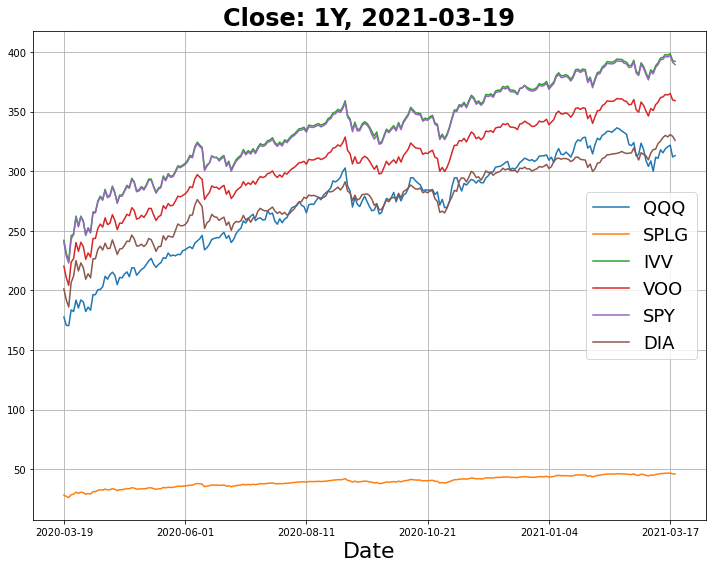

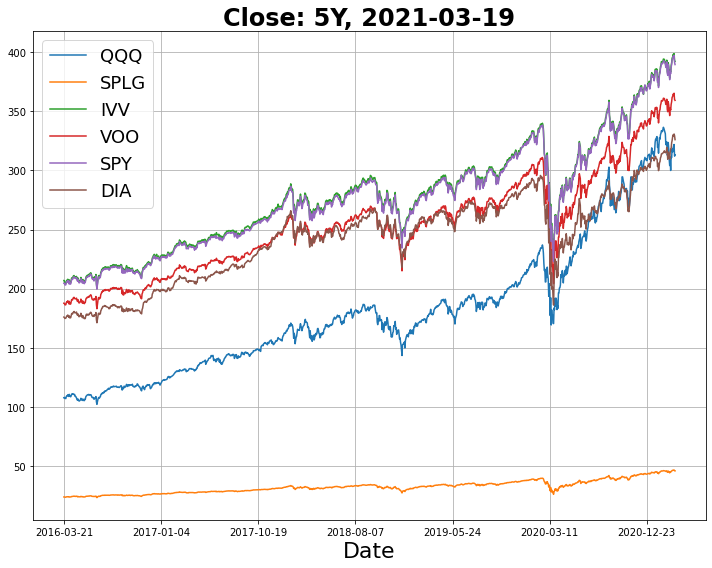

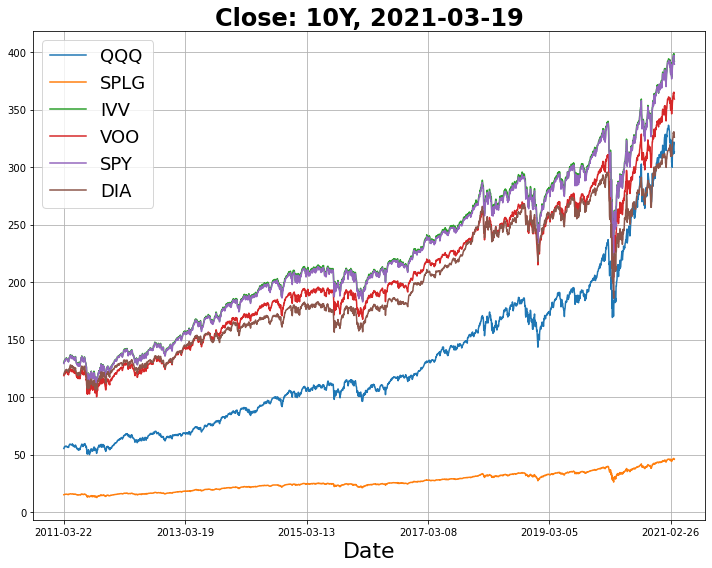

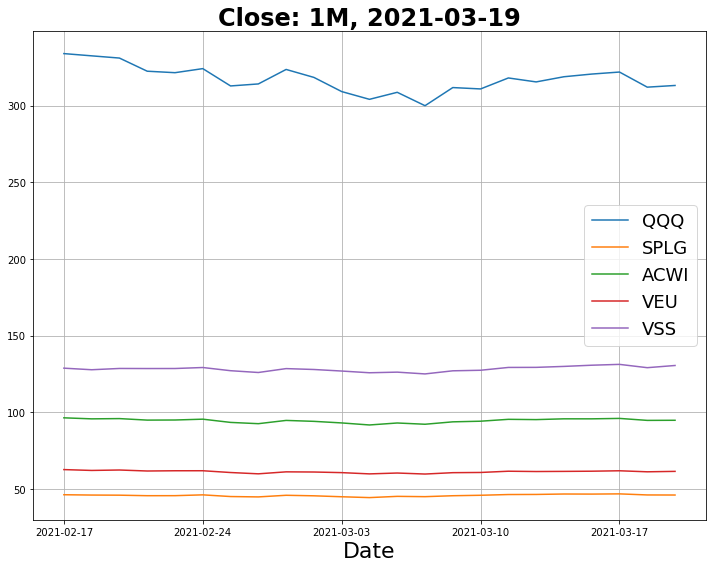

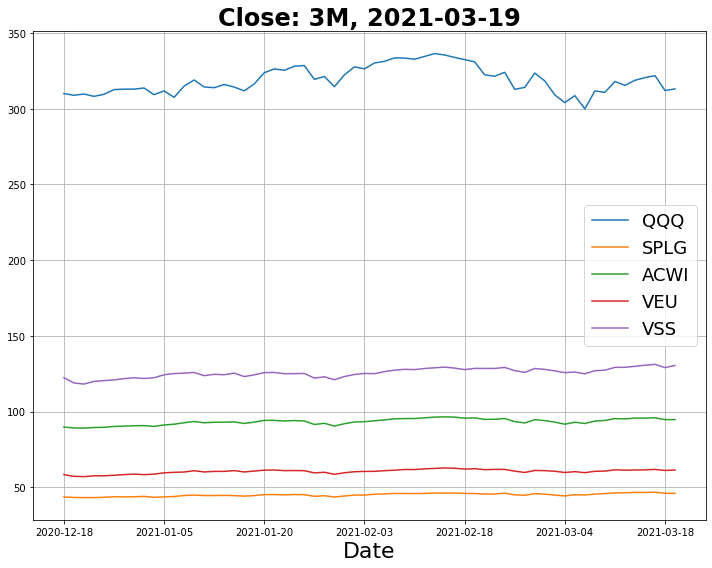

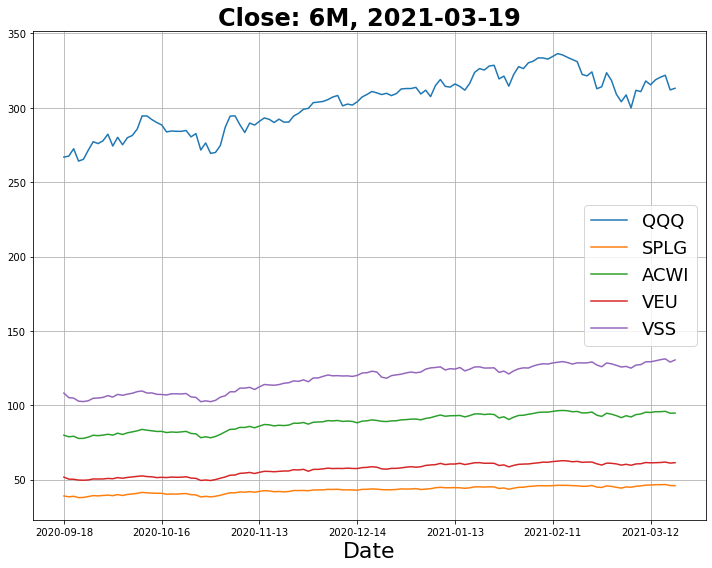

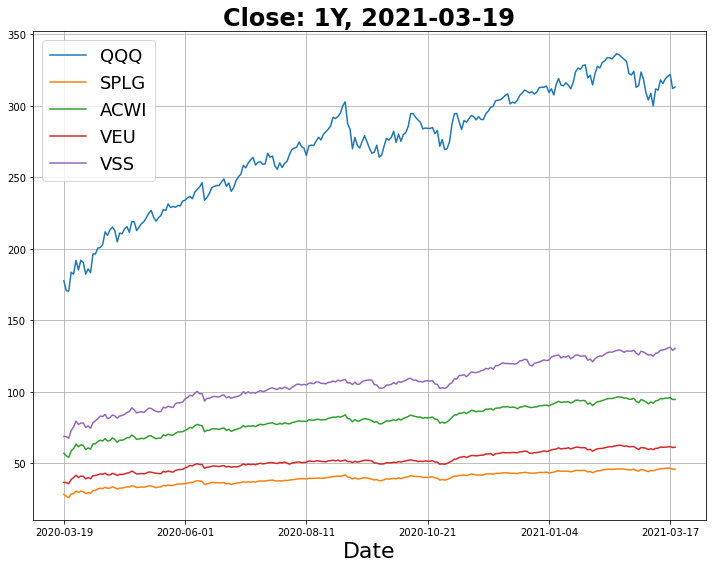

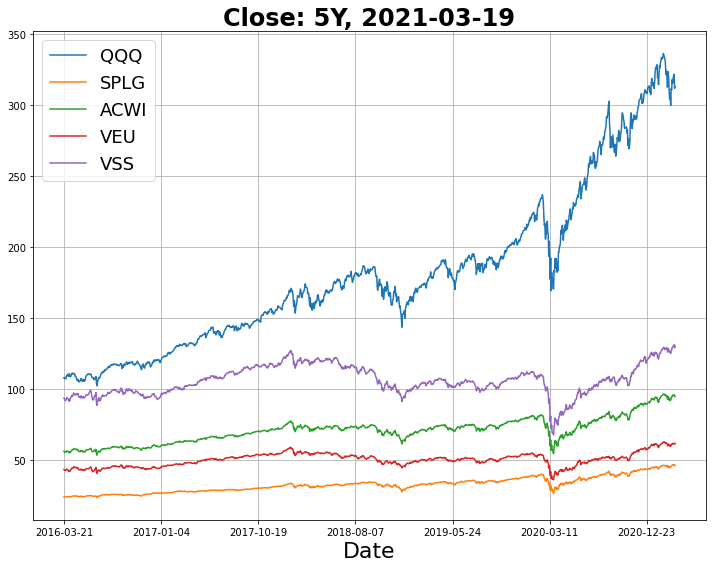

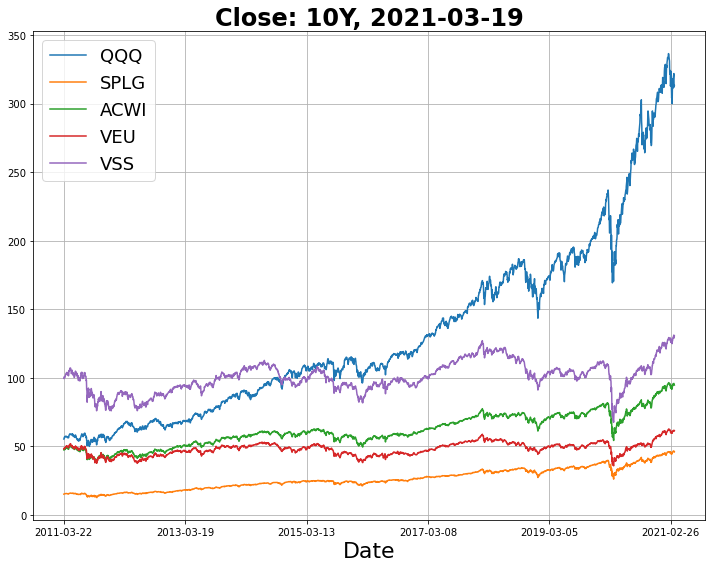

In [10]:
close_charts(qqq_symbols)
close_charts(sp_symbols)
close_charts(glob_symbols)

### 2. Volatility - Histograms

In [11]:
df = rel_returns(qqq_symbols, ten_yr)

In [12]:
df

QQQ      SPLG       DIA       VEU
Date                                              
2011-03-22  1.000000  1.000000  1.000000  1.000000
2011-03-23  1.005596  1.003127  1.005921  1.004360
2011-03-24  1.023466  1.009873  1.012842  1.016400
2011-03-25  1.025993  1.017114  1.017011  1.007889
2011-03-28  1.020397  1.015304  1.015344  1.005398
...              ...       ...       ...       ...
2021-03-15  5.755054  3.069278  2.752585  1.274445
2021-03-16  5.786642  3.065987  2.742328  1.276936
2021-03-17  5.810469  3.075202  2.758255  1.282749
2021-03-18  5.632491  3.029126  2.746498  1.268840
2021-03-19  5.652347  3.025835  2.718562  1.274652

[2516 rows x 4 columns]

In [13]:
# create histograms for returns, qqq_symbols list
for x in range(len(dates_list)):
    df = rel_returns(qqq_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.DIA.hist(bins=50, label='DIA', alpha=0.5)
    df.VEU.hist(bins=50, label='VEU', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_qqq_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [14]:
# create histograms kernel for clarity, qqq_symbols list
for x in range(len(dates_list)):
    df = rel_returns(qqq_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    df.SPLG.plot(kind='kde', label='SPLG')
    df.DIA.plot(kind='kde', label='DIA')
    df.VEU.plot(kind='kde', label='VEU')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_qqq_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [15]:
# repeat operations for sp_symbols, glob_symbols
for x in range(len(dates_list)):
    df = rel_returns(sp_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.IVV.hist(bins=50, label='IVV', alpha=0.5)
    df.VOO.hist(bins=50, label='VOO', alpha=0.5)
    df.SPY.hist(bins=50, label='SPY', alpha=0.5)
    df.DIA.hist(bins=50, label='DIA', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_sp_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()
for x in range(len(dates_list)):
    df = rel_returns(sp_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    df.SPLG.plot(kind='kde', label='SPLG')
    df.IVV.plot(kind='kde', label='IVV')
    df.VOO.plot(kind='kde', label='VOO')
    df.SPY.plot(kind='kde', label='SPY')
    df.DIA.plot(kind='kde', label='DIA')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_sp_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

In [16]:
for x in range(len(dates_list)):
    df = rel_returns(glob_symbols, dates_list[x])
    df.QQQ.hist(bins=50, figsize=(10,8), label='QQQ', alpha=0.5)
    df.SPLG.hist(bins=50, label='SPLG', alpha=0.5)
    df.ACWI.hist(bins=50, label='ACWI', alpha=0.5)
    df.VEU.hist(bins=50, label='VEU', alpha=0.5)
    df.VSS.hist(bins=50, label='VSS', alpha=0.5)
    plt.title(f'Volatility: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.savefig(f"../images/vol_hist/histogram_glob_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()
for x in range(len(dates_list)):
    df = rel_returns(glob_symbols, dates_list[x])
    df.QQQ.plot(kind='kde', label='QQQ', figsize=(10,8))
    df.SPLG.plot(kind='kde', label='SPLG')
    df.ACWI.plot(kind='kde', label='ACWI')
    df.VEU.plot(kind='kde', label='VEU')
    df.VSS.plot(kind='kde', label='VSS')
    plt.title(f'Volatility Normalized: {dates_str[x]}, {last_date}', fontweight='bold', fontsize=24)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.grid()
    plt.savefig(f"../images/vol_hist/ked_hist_glob_symbols_{dates_str[x]}.jpg", dpi=75)
    plt.clf()

<Figure size 720x576 with 0 Axes>

### Correlation

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
def scatter_plots(portfolio_list):
    for portfolio in portfolio_list:
        for x in range(len(dates_list)):
            df = close_compare(portfolio, dates_list[x])
            scatter_matrix(df, figsize=(10,10), color='dodgerblue', hist_kwds={'color':'lightblue', 'alpha':0.50, 'bins':50})
            plt.tight_layout()
            plt.savefig(f"../images/correlation/scatter_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=150)

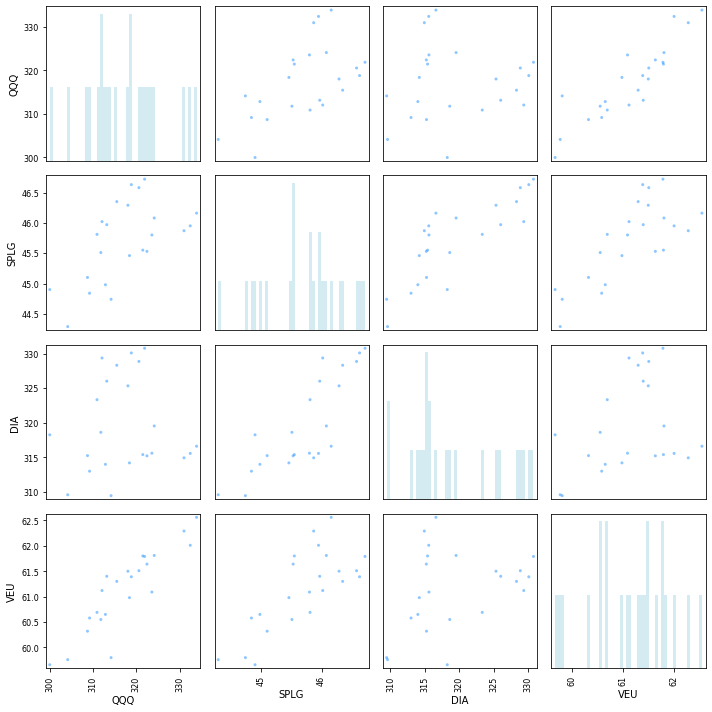

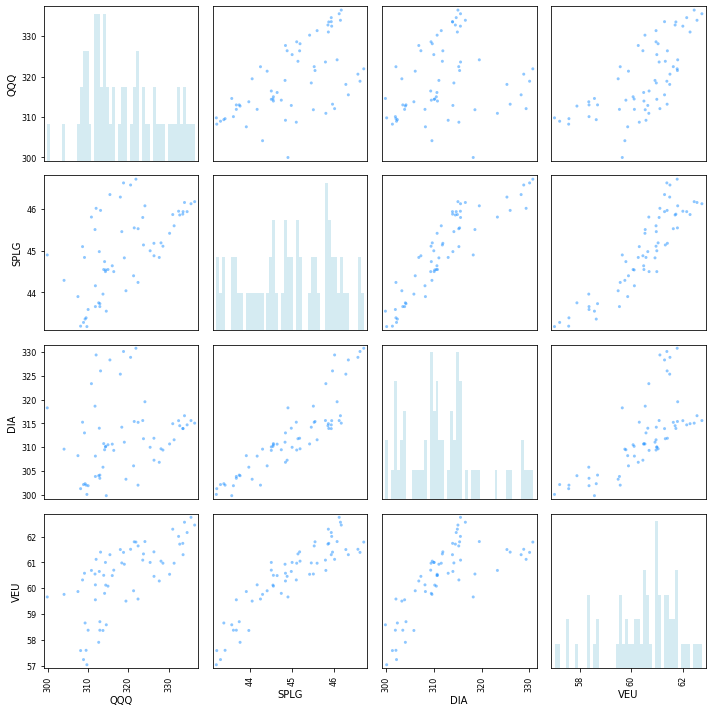

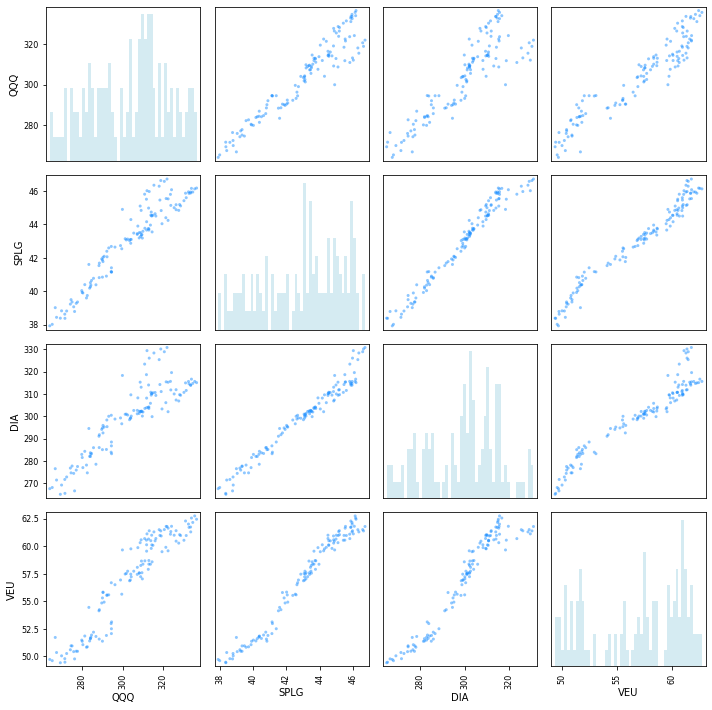

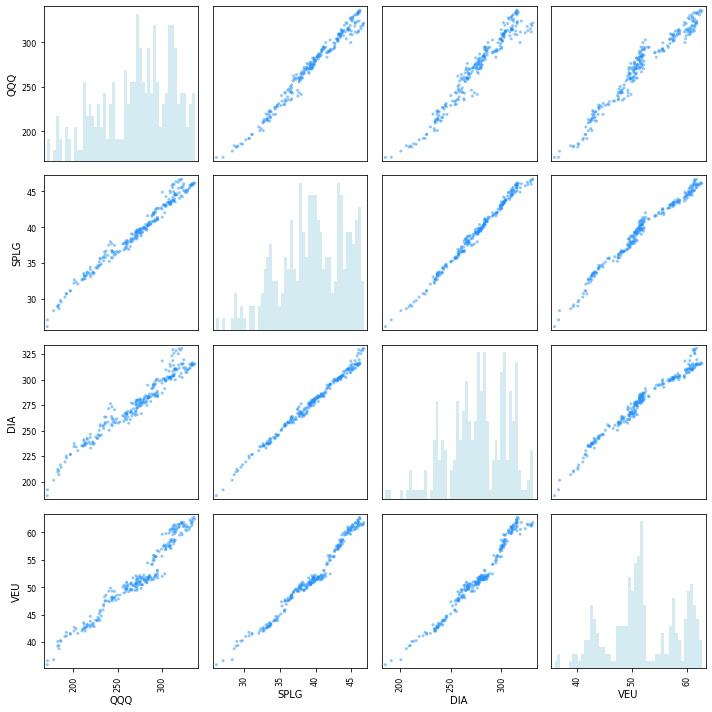

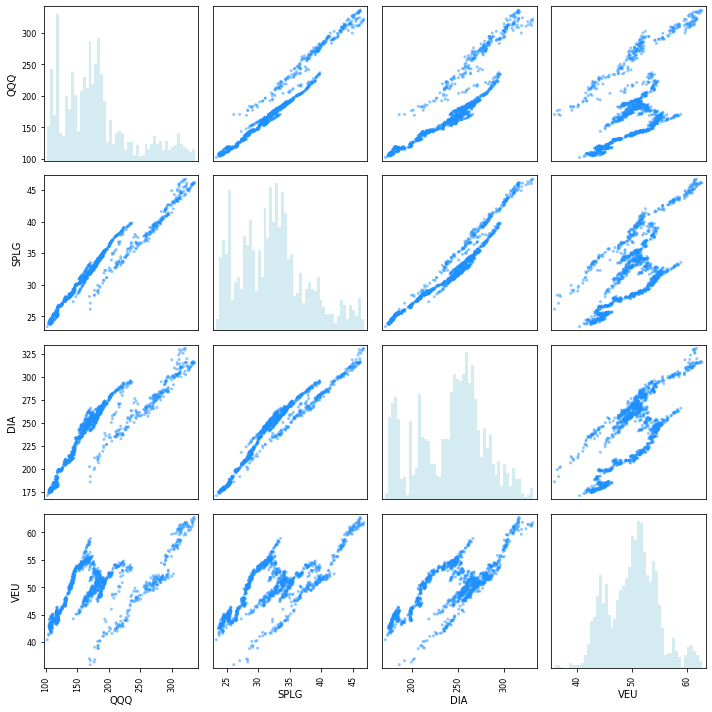

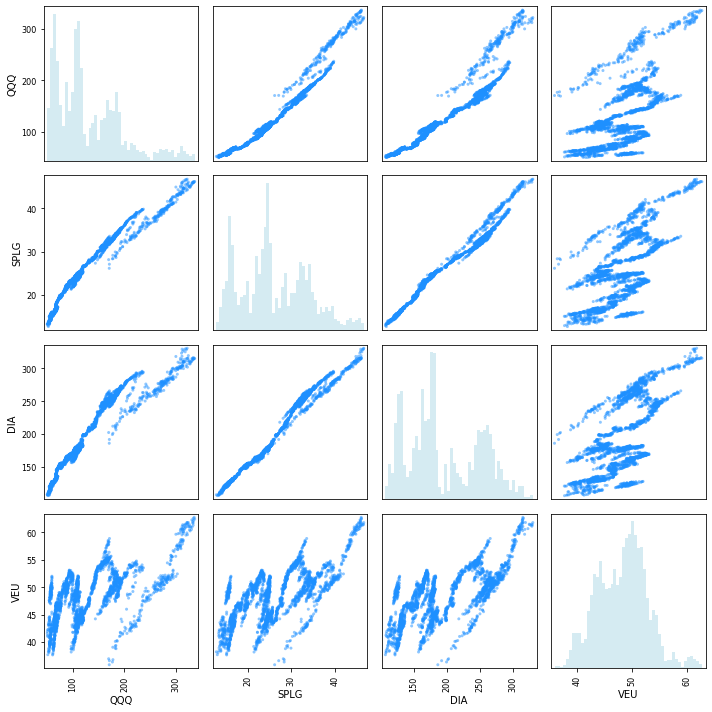

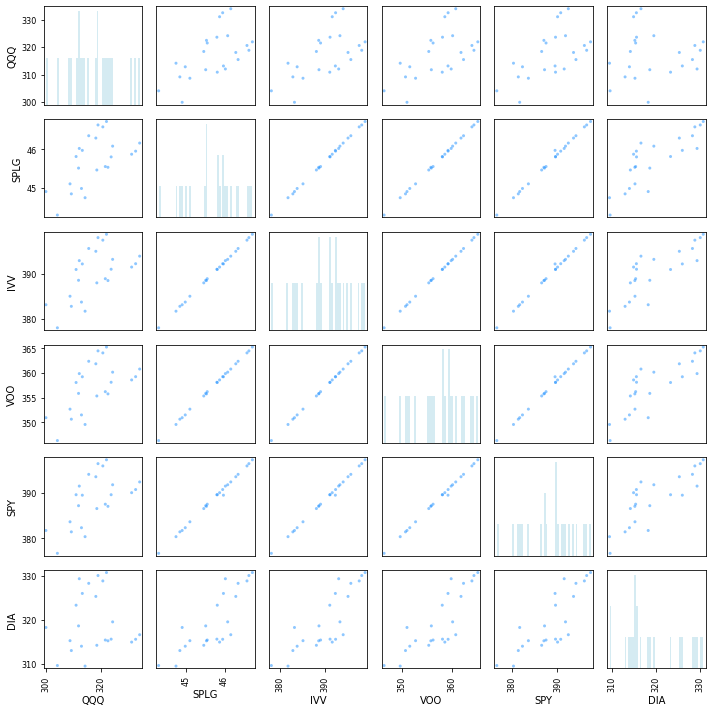

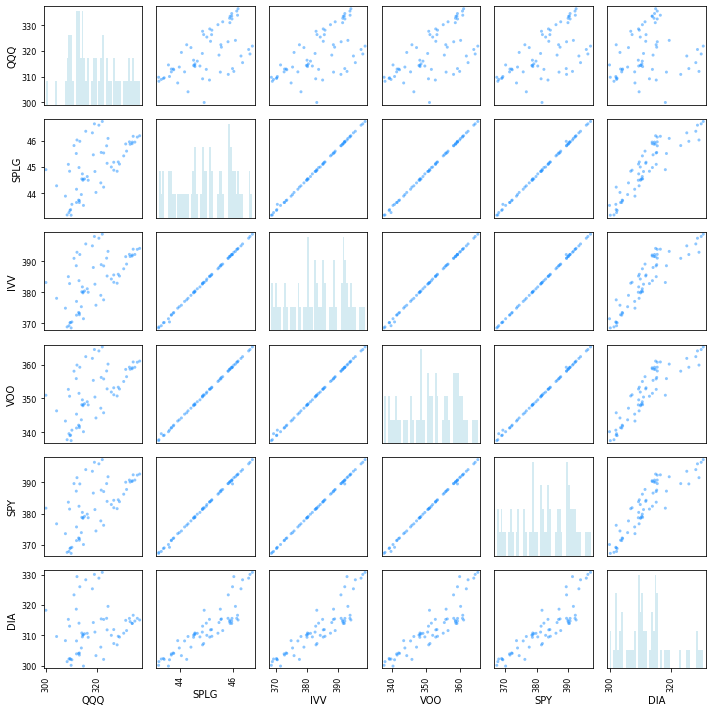

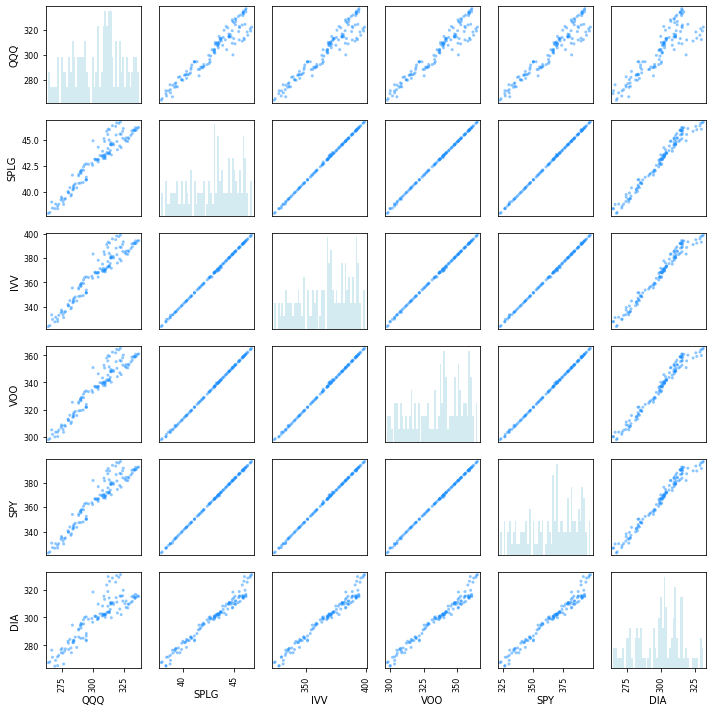

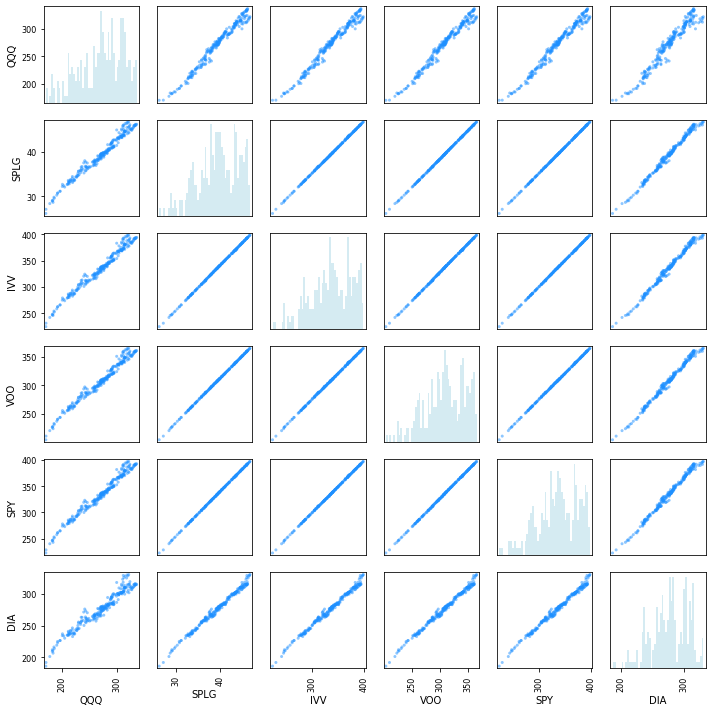

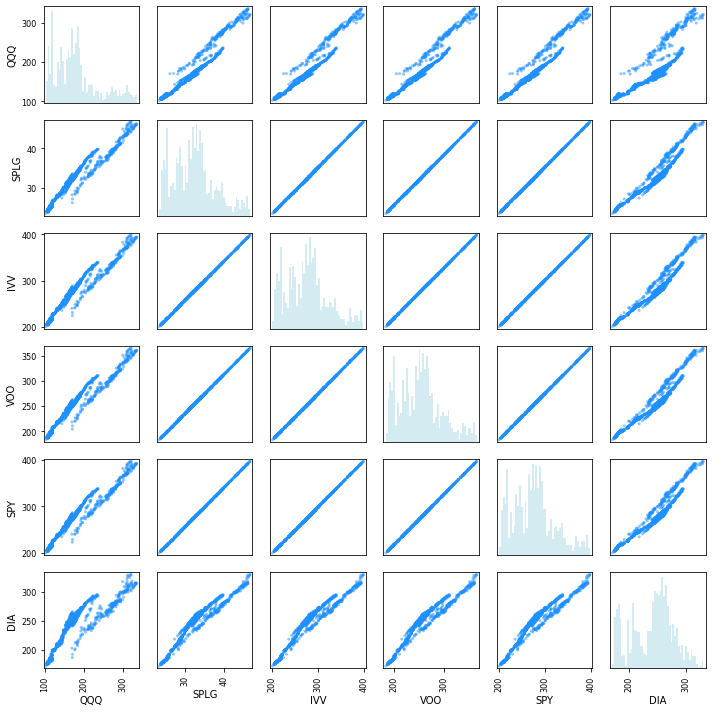

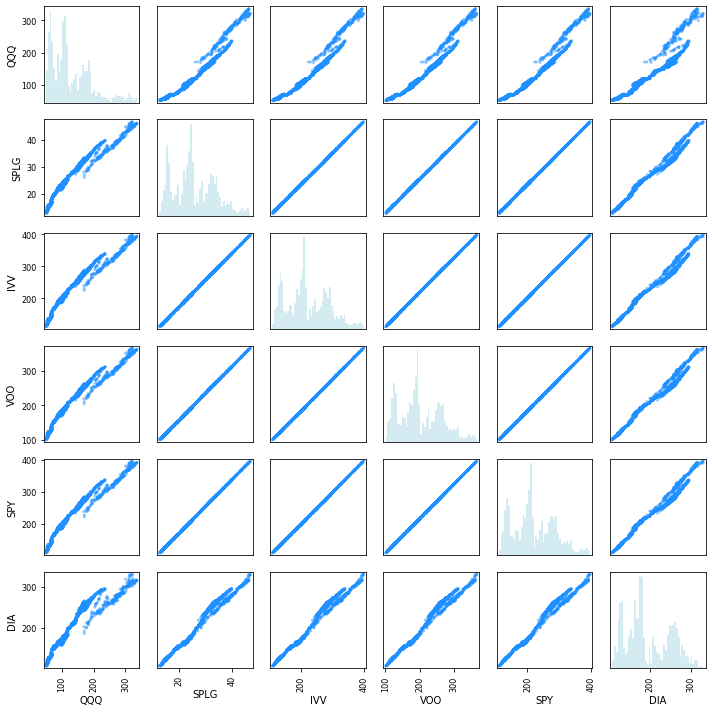

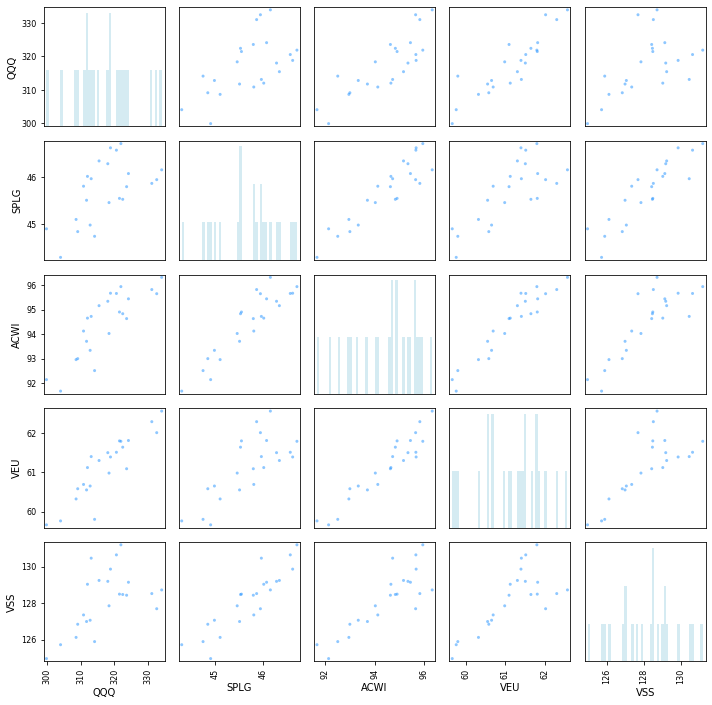

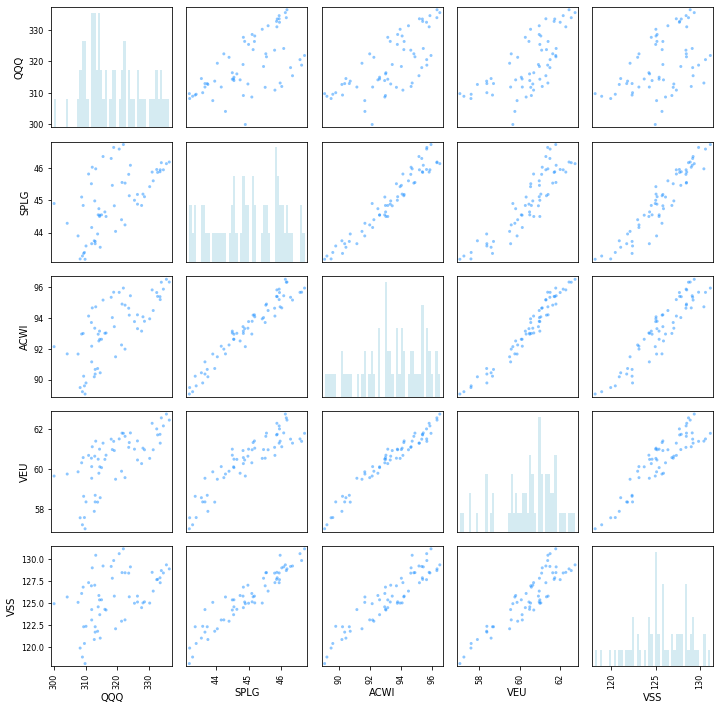

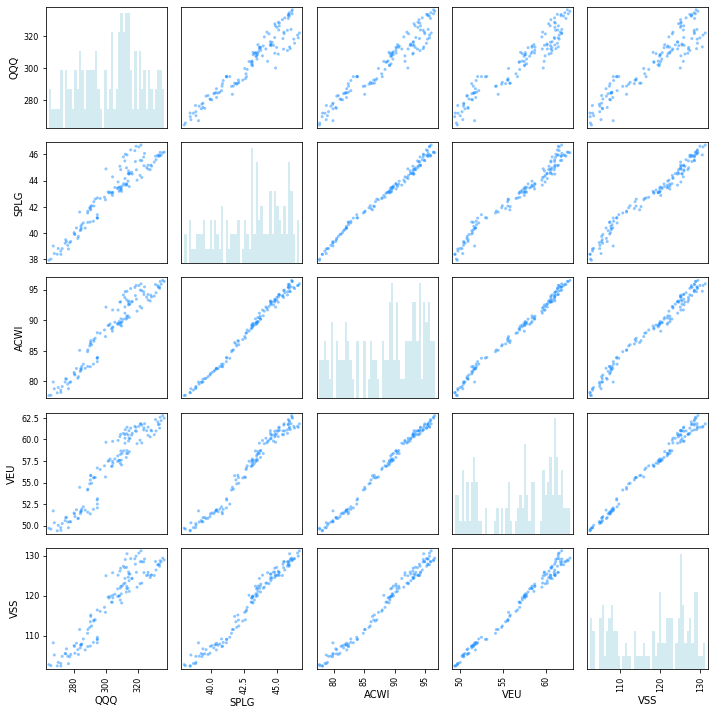

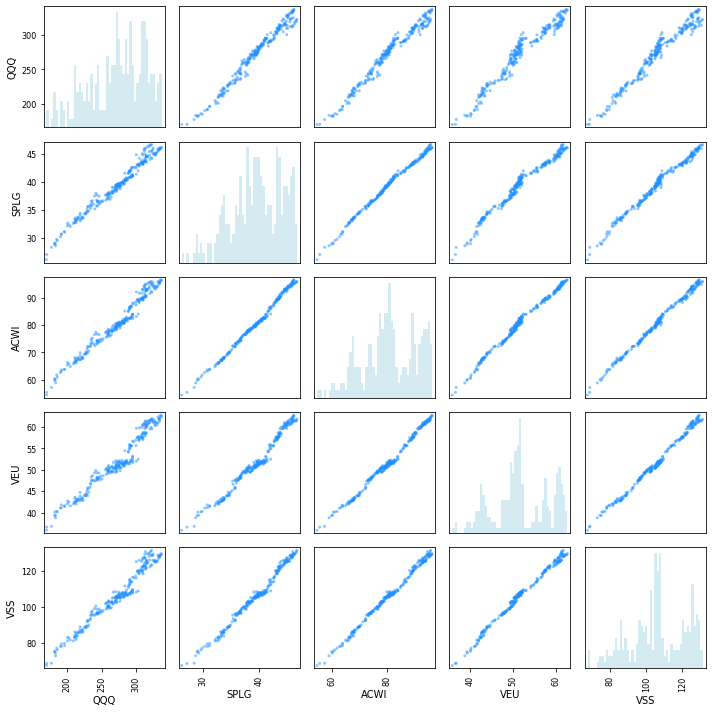

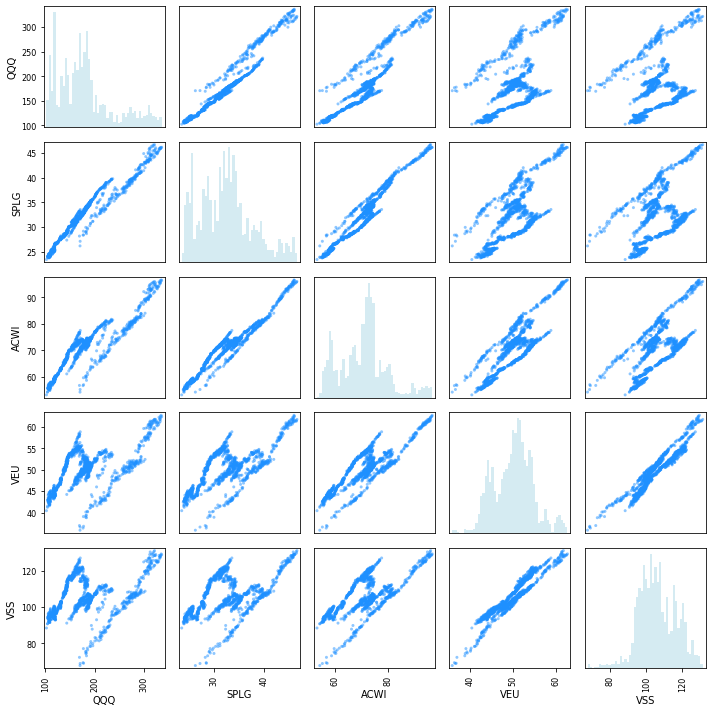

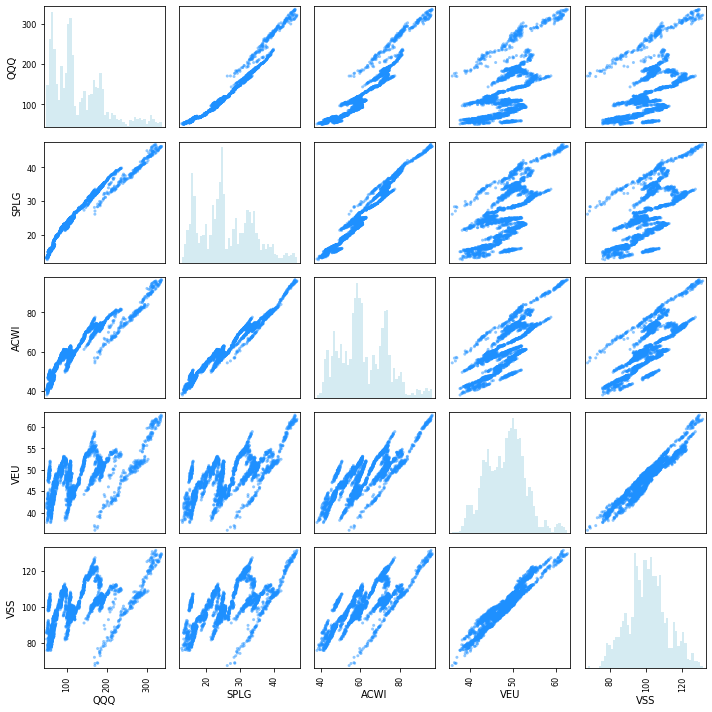

In [19]:
scatter_plots(portfolios)

### Monte Carlo Simulation

In [20]:
# create function that randomly selects a 60 day period 1000 times, plots the simulation and...
# an easier to read quantile version
def monte_carlo(portfolio):
    for x in range(len(dates_list)):
        stocks = close_compare(portfolio, dates_list[x])
        prf_returns = (stocks.pct_change() +1)[1:]
        simulated = pd.DataFrame([((prf_returns.iloc[random.choices(range(len(prf_returns)), k=60)])\
                        .mean(axis=1)).cumprod().values for x in range(1000)]).T
        simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(12,8))
        plt.tight_layout()
        plt.savefig(f"../images/monte_carlo/simulated_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=150)
        plt.clf()
        simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(12,8))
        plt.legend(fontsize=18)
        plt.tight_layout()
        plt.savefig(f"../images/monte_carlo/quantile_{portfolio[-1]}_{dates_str[x]}.jpg", dpi=75)
        plt.clf()

In [21]:
monte_carlo(qqq_symbols)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [22]:
monte_carlo(sp_symbols)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [23]:
monte_carlo(glob_symbols)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>